In [5]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

import scipy.constants as const
import scipy
from scipy.io import wavfile
from IPython.core.display import HTML
from __future__ import division

# this is a wrapper that take a filename and publish an html <audio> tag to listen to it

def wavPlayer(filepath):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))

numpy signal shape: (18432,)


C:\Users\vntdeca\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.


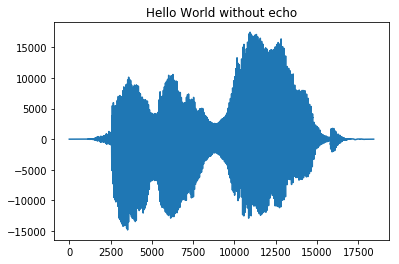

In [8]:
# If you right-click on the file and go to "Get Info", you can see:
# sampling rate = 16000 Hz
# bits per sample = 16
# The first is quantization in time
# The second is quantization in amplitude
# We also do this for images!
# 2^16 = 65536 is how many different sound levels we have
# 2^8 * 2^8 * 2^8 = 2^24 is how many different colors we can represent

spf = wave.open('helloworld.wav', 'r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')
print("numpy signal shape:", signal.shape)

plt.plot(signal)
plt.title("Hello World without echo")
plt.show()

In [10]:
wavPlayer('helloworld.wav')

In [9]:
delta = np.array([1., 0., 0.])
noecho = np.convolve(signal, delta)
print("noecho signal:", noecho.shape)

noecho signal: (18434,)


In [11]:
noecho = noecho.astype(np.int16) # make sure you do this, otherwise, you will get VERY LOUD NOISE
wavfile.write('noecho.wav', 16000, noecho)
wavPlayer('noecho.wav')

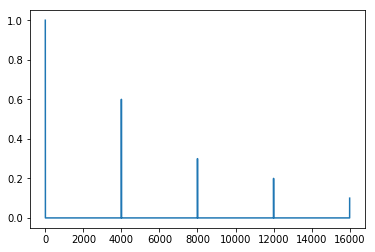

In [15]:
filt = np.zeros(16000)
filt[0] = 1
filt[4000] = 0.6
filt[8000] = 0.3
filt[12000] = 0.2
filt[15999] = 0.1
plt.plot(filt)
plt.show()

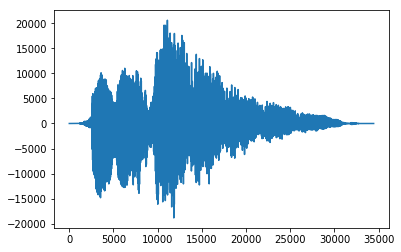

In [16]:
out = np.convolve(signal, filt)
plt.plot(out)
plt.show()

In [17]:
out = out.astype(np.int16)
wavfile.write('out.wav', 16000, out) # make sure you do this, otherwise, you will get VERY LOUD NOISE
wavPlayer('out.wav')